In [2]:
# Loading data
geno <-read.table("./Hetero_realigned_cov10_filtered3.raw", 
                  row.names=1, header=T)
row.names(geno)=1:240

## Number of SNPs for each chromosome

In [3]:
# Position data
lin_map<-read.table("raw.map")
m<-1:22; chr<-1:22
for(i in chr) {m[i]=dim(lin_map[lin_map$V1==i,])[1]}
data<-data.frame(SNP=m,chr=chr)
sum(data$SNP) # total SNPs 

[1] 3928

png 
  2

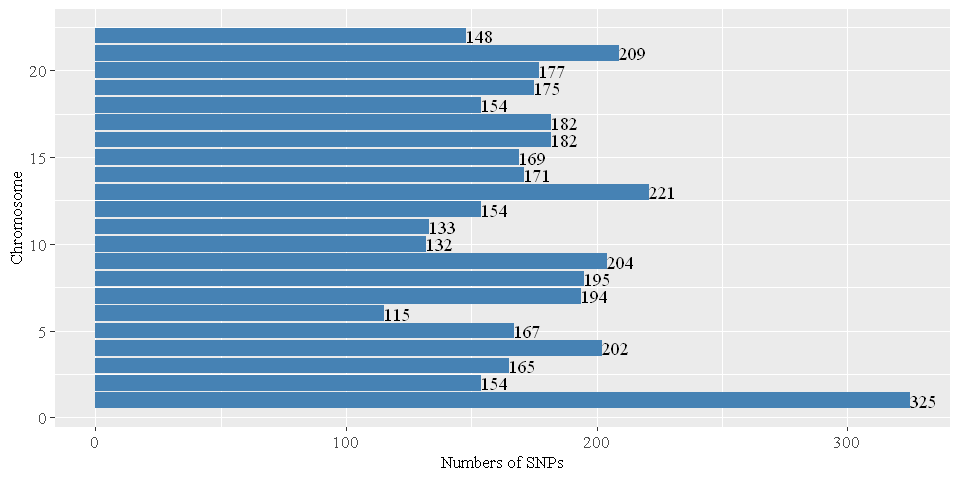

In [15]:
library("extrafont")
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=4)
p<-ggplot(data=data, aes(x=chr, y=SNP))+
  geom_bar(stat="identity", fill="steelblue")+
  geom_text(aes(label=SNP), hjust = 0, color ="black",
            family="serif", size=4)+
  labs(x="Chromosome", y="Numbers of SNPs")+
  theme(axis.text.y=element_text(size=10),
        axis.text.x=element_text(size=10),
        text=element_text(size=10, 
        family="serif"))+
  coord_flip()
png("Marker_distrbution.png", width=8, height=4, units="in", res=300)
# Horizontal bar plot
plot(p)
dev.off()
p

## Heterozigosity

In [29]:
# Function for calculation of heterozigosity
hetero_loci<-function(geno){
   n<-list()
   for (i in 1:length(geno)){
   m<-(data.frame(table(geno[,i])))    
   n[i]<-m[m[,1]==1,][1,2]/240
       }
    return(n)
    }

In [30]:
i<-hetero_loci(geno)
summary(as.numeric(i))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008333 0.554167 0.779167 0.705820 0.908333 1.000000 